# Schrodinger Eqn 1D step-potential


In [1]:
import numpy as np
from scipy import integrate
from scipy import sparse
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
import warnings
warnings.filterwarnings('ignore')    #suppress warnings
plt.rc('savefig', dpi=200)
plt.rcParams['text.usetex'] = True

plt.rcParams['animation.embed_limit'] = 2**3
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Set initial conditions

In [2]:
dx = 0.01                   # spatial separation
x_last = 8
x = np.arange(0, x_last, dx)    # spatial grid points
kx = 50                     # wave number
m = 1                       # mass
sigma = 0.5                 # width of initial gaussian wave-packet
x0 = 2                      # center of initial gaussian wave-packet

### Initial Wavefunction

In [3]:
A = 1.0 / (sigma * np.sqrt(np.pi))  # normalization constant
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)

### Potential V(x)

In [4]:
V_hight = 1000

V = np.zeros(x.shape)
for i, _x in enumerate(x):
    #if _x > 5:
        
    if (_x > 4) & (_x < 5) :
        V[i] = V_hight

### Make a plot of $ \displaystyle \psi_o$ and V

Total Probability:  0.999999992909358


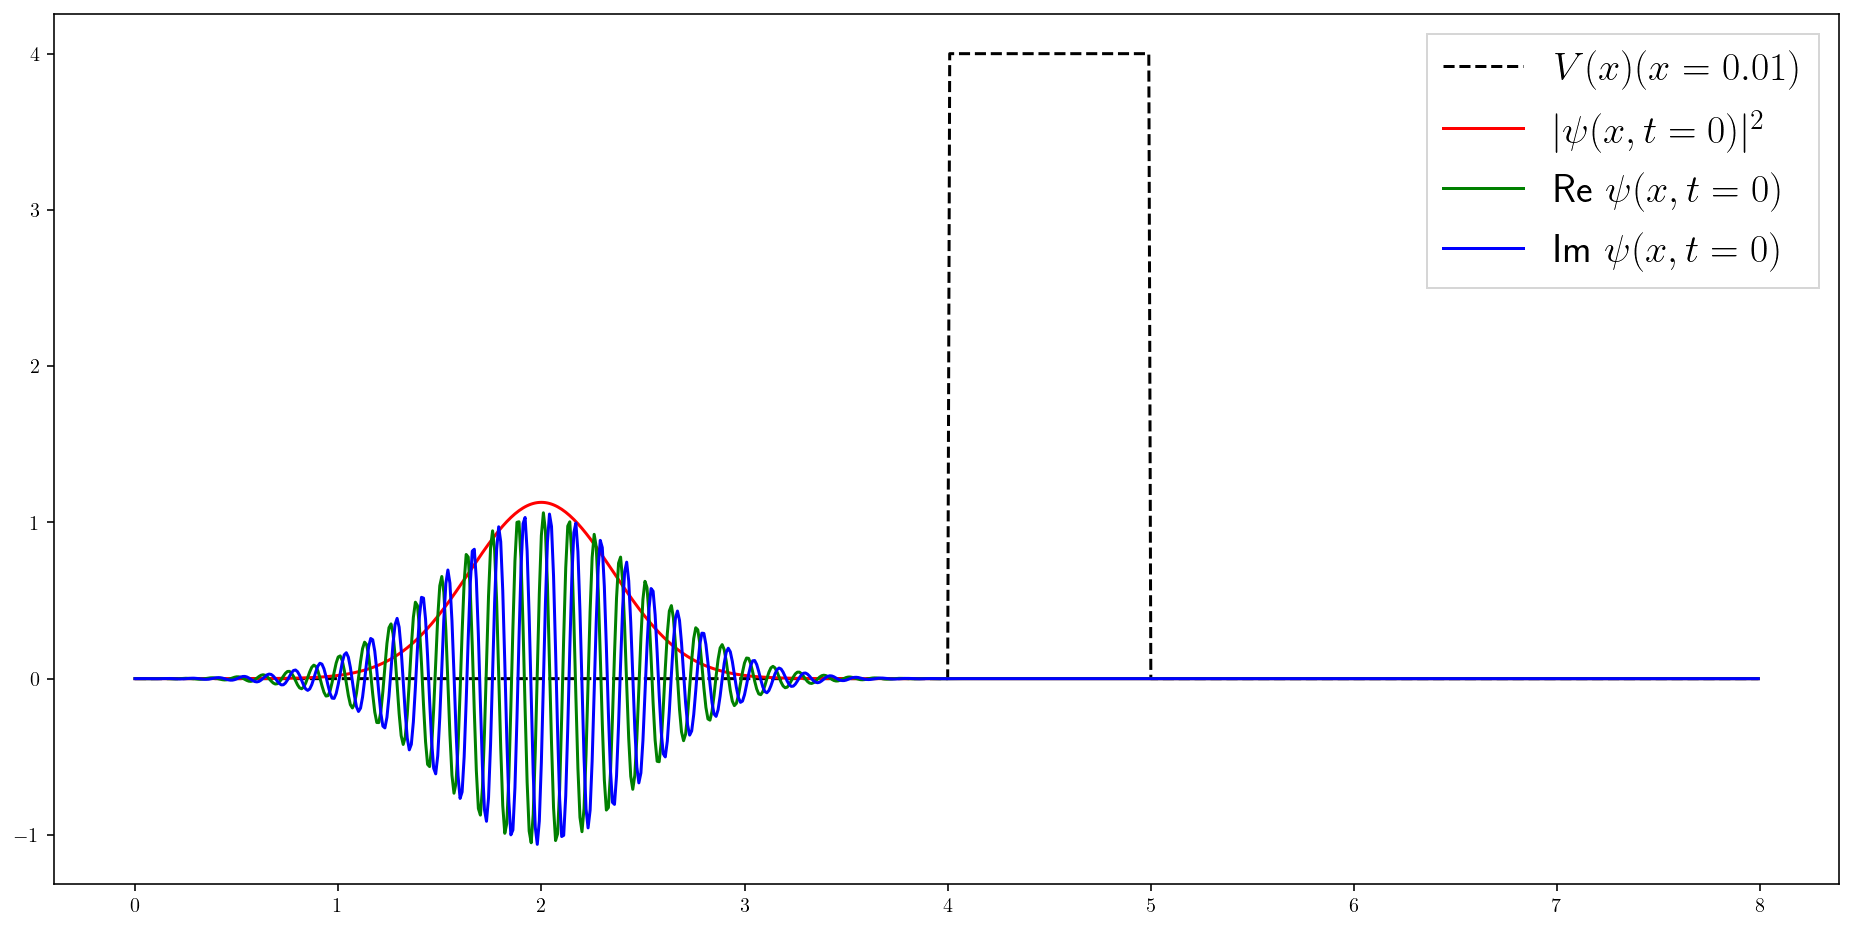

In [5]:
fig = plt.figure(figsize=(16,8))
plt.plot(x, V*0.004, "k--", label=r"$V(x) (x=0.01)$")
plt.plot(x, np.abs(psi0)**2, "r", label=r"$\vert\psi(x,t=0)\vert^2$")
plt.plot(x, np.real(psi0), "g", label="Re $\psi(x,t=0)$")
plt.plot(x, np.imag(psi0), "b", label="Im $\psi(x,t=0)$")
plt.legend(loc=1, fontsize=20,fancybox=False)
print("Total Probability: ", np.sum(np.abs(psi0)**2)*dx)

### Laplace Operator (Finite Difference)

In [6]:
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

### Solve Schrodinger Equation

Solving initial value problem


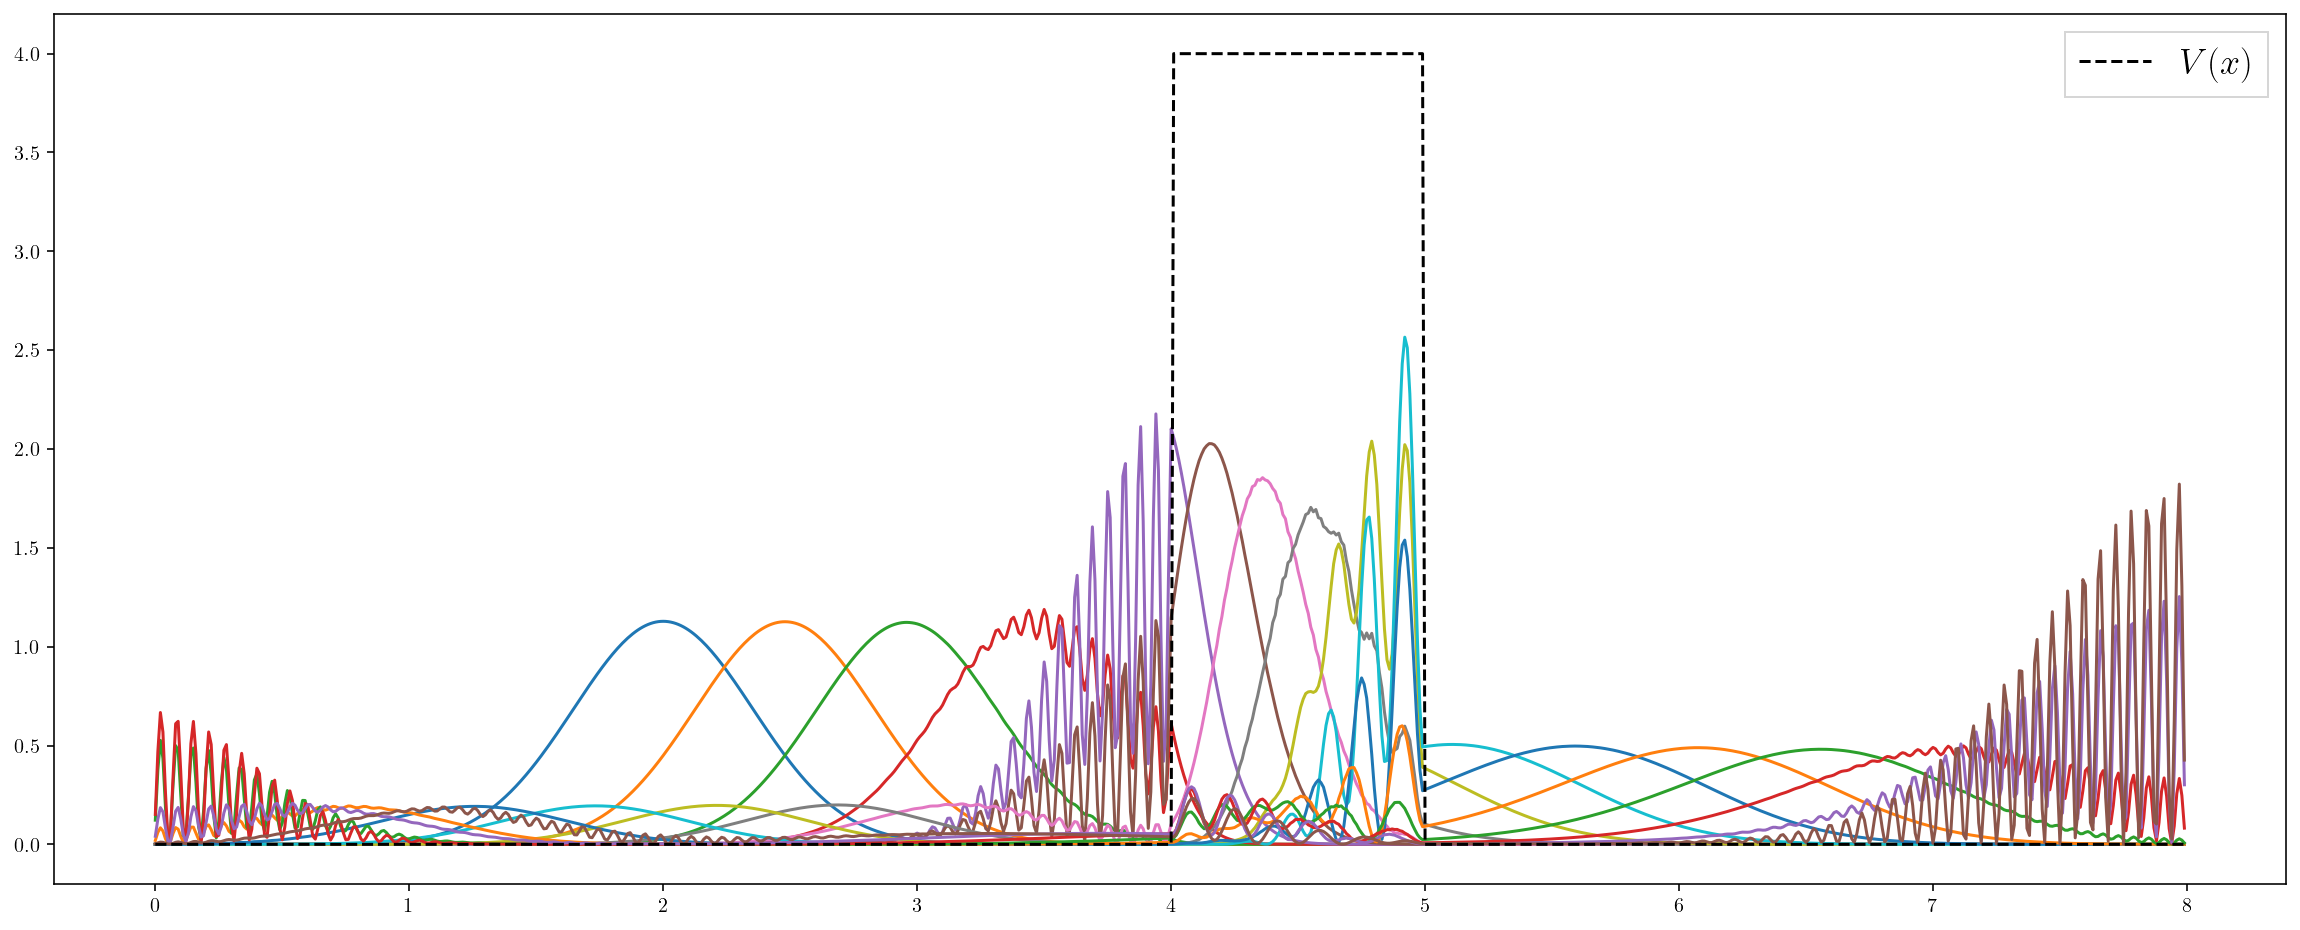

In [8]:
hbar = 1      # hbar = 1.0545718176461565e-34 RHS of Schrodinger Equation

def psi_t(t, psi):            # Solve the Initial Value Problem
    return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)


dt = 0.01  # time interval for snapshots
t0 = 0.0    # initial time
tf = 0.16    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

print("Solving initial value problem")
sol = integrate.solve_ivp(psi_t,t_span = [t0, tf],y0 = psi0,t_eval = t_eval,method = "RK23")
fig = plt.figure(figsize=(20, 8))
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:, i])**2)                  
#    print("Total Prob. in frame", i, "=", np.sum(np.abs(sol.y[:, i])**2)*dx)   # Print Total Probability (Should = 1)
plt.plot(x, V * 0.004, "k--", label=r"$V(x)$")   # Plot Potential
plt.legend(loc=1, fontsize=18, fancybox=False)
plt.show()

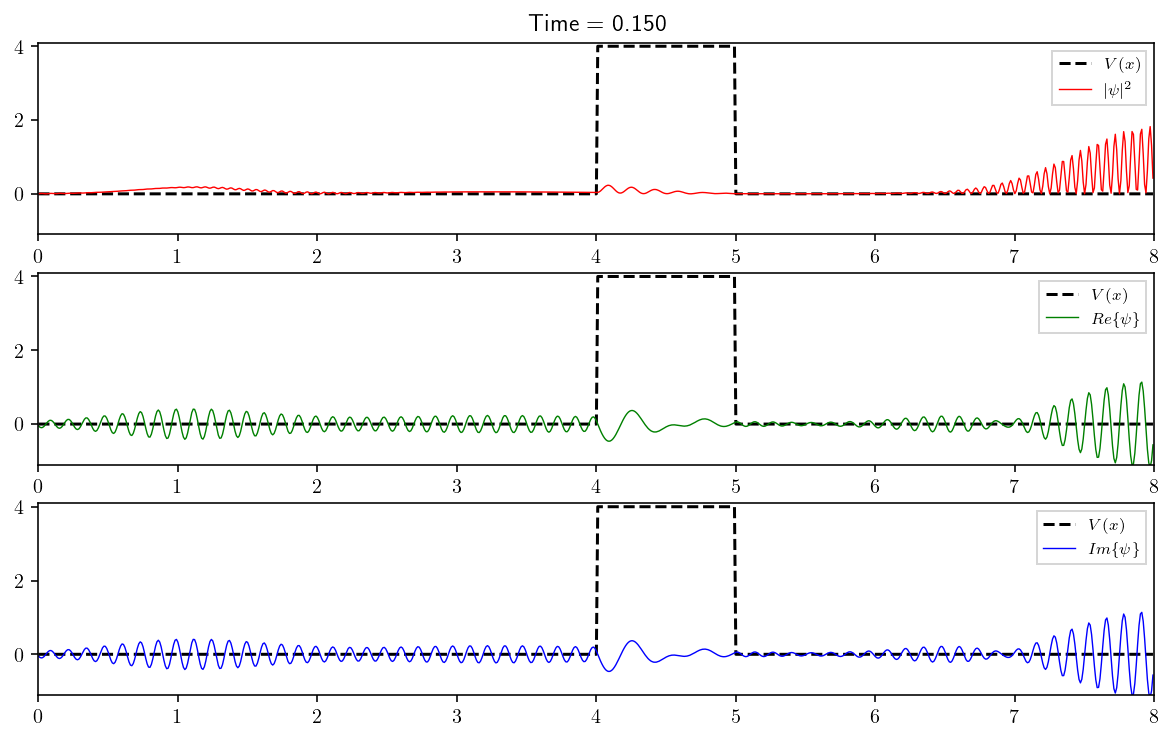

In [9]:
fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot(3, 1, 1)
ax1.set_xlim(0, 8)
ax1.set_ylim(-1.1, 4.1)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$")
line12, = ax1.plot([], [], "r", label=r"$\vert \psi \vert^2$",linewidth=0.7)
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(3, 1, 2)
ax2.set_xlim(0, 8)
ax2.set_ylim(-1.1, 4.1)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$")
line22, = ax2.plot([], [], "g", label=r"$Re\{ \psi \}$",linewidth=0.7)
plt.legend(loc=1, fontsize=8, fancybox=False)

ax3 = plt.subplot(3, 1, 3)
ax3.set_xlim(0, 8)
ax3.set_ylim(-1.1, 4.1)
line31, = ax3.plot([], [], "k--", label=r"$V(x)$")
line32, = ax3.plot([], [], "b", label=r"$Im\{ \psi \}$",linewidth=0.7)
plt.legend(loc=1, fontsize=8, fancybox=False)

def init():
    line11.set_data(x, V * 0.004)
    line21.set_data(x, V * 0.004)
    line31.set_data(x, V * 0.004)
    return line11, line21, line31

def animate(i):
    line12.set_data(x, np.abs(sol.y[:, i])**2)
    line22.set_data(x, np.real(sol.y[:, i]))
    line32.set_data(x, np.real(sol.y[:, i]))
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line12, line22, line32

anim1 = animation.FuncAnimation(fig, animate, init_func=init,frames=len(sol.t), interval=100, blit=True)
anim1.save('finite@2xfp.gif', writer='pillow', fps=20)
HTML(anim1.to_jshtml())

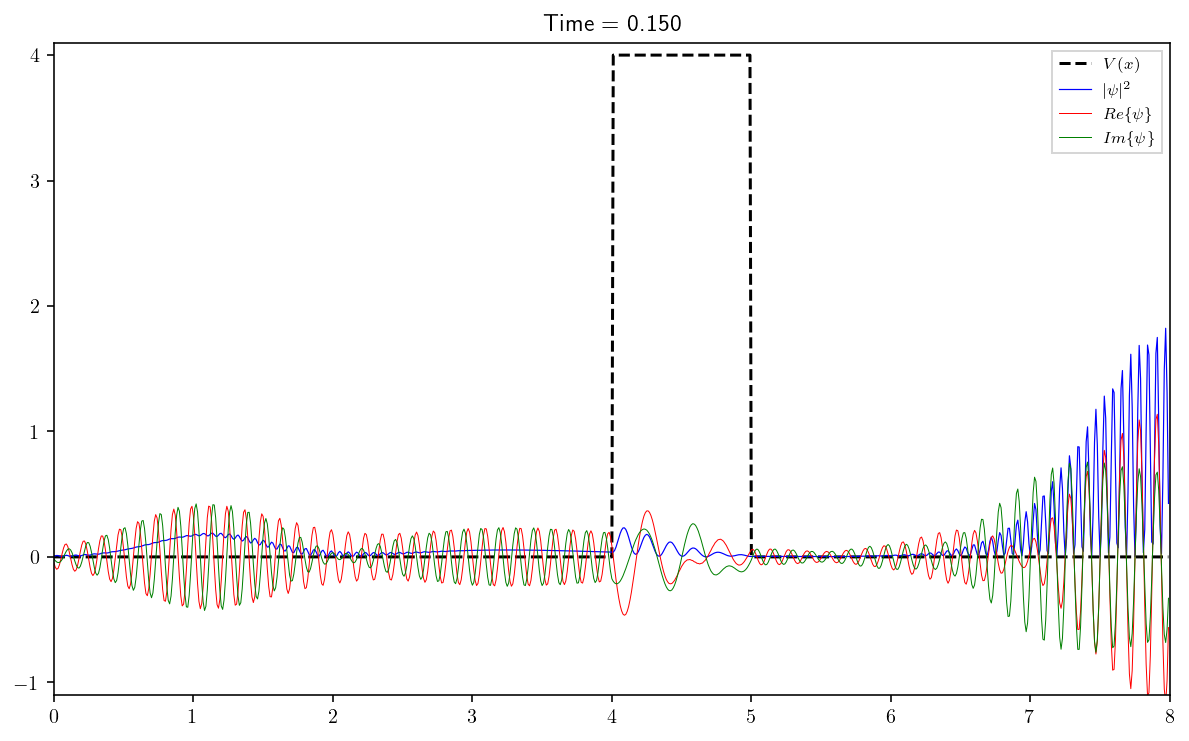

In [10]:
fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1, 1, 1)
ax1.set_xlim(0, 8)
ax1.set_ylim(-1.1, 4.1)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--", label=r"$V(x)$ ")
line2, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$",linewidth=0.6)
line3, = ax1.plot([], [], "r", label=r"$Re\{ \psi \}$",linewidth=0.5)
line4, = ax1.plot([], [], "g", label=r"$Im\{ \psi \}$",linewidth=0.5)
plt.legend(loc=1, fontsize=8, fancybox=False)

def init():
    line1.set_data(x, V * 0.004)
    return line1, line1, line1

def animate(i):
    line2.set_data(x, np.abs(sol.y[:, i])**2)
    line3.set_data(x, np.real(sol.y[:, i]))
    line4.set_data(x, np.imag(sol.y[:, i]))
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line2, line3, line4

anim1 = animation.FuncAnimation(fig, animate, init_func=init,frames=len(sol.t), interval=100, blit=True)
anim1.save('finitecomb@2xfp.gif', writer='pillow', fps=20)
HTML(anim1.to_jshtml())